In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

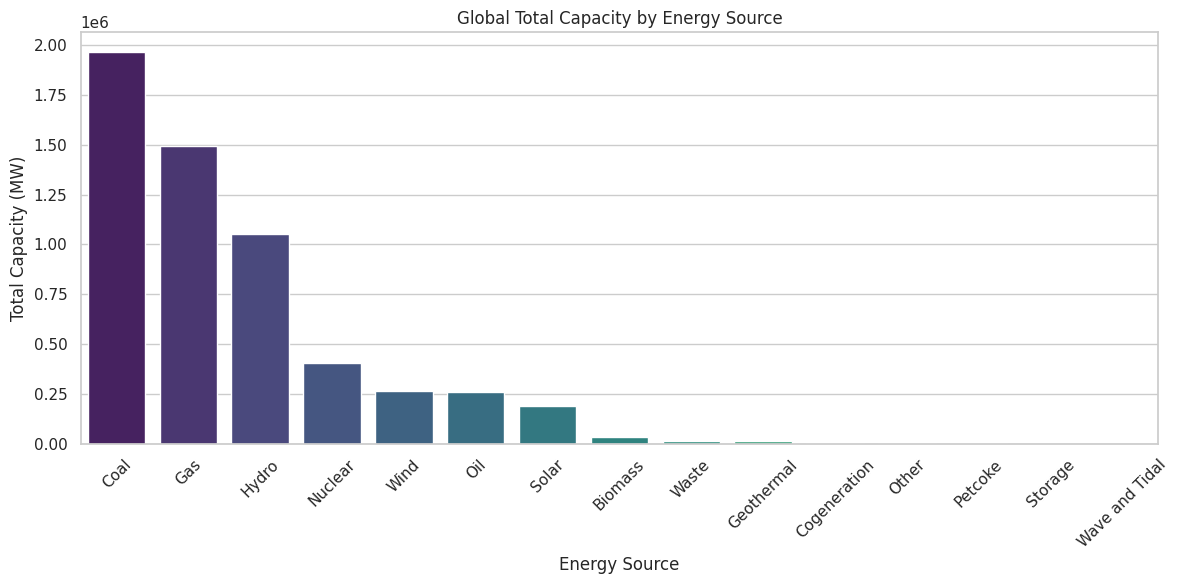

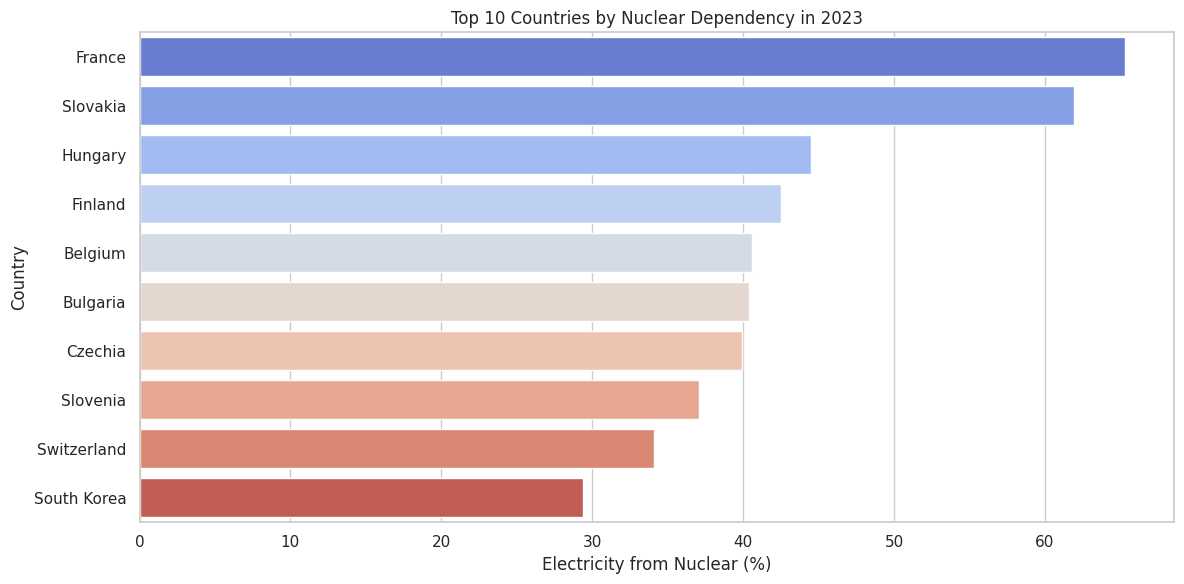

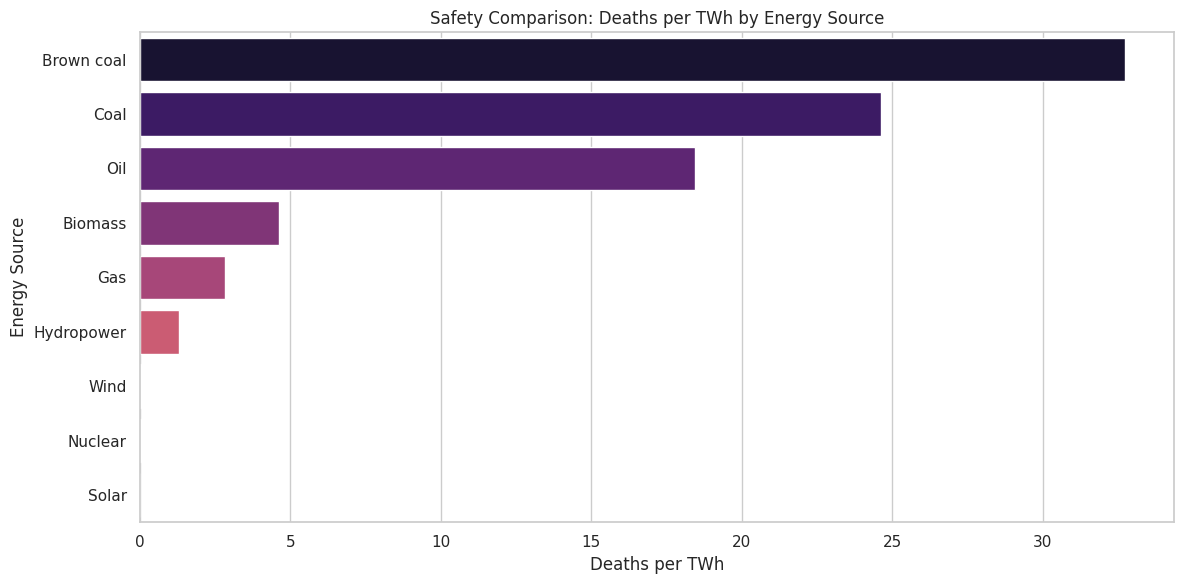

In [15]:
# -----------------------------
# Import libraries
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# -----------------------------
# 1. Load datasets
# -----------------------------
power_global = pd.read_csv("/kaggle/input/nuclear-energy-datasets/power_plant_database_global.csv", low_memory=False)
nuclear_world = pd.read_csv("/kaggle/input/nuclear-energy-datasets/world_nuclear_energy_generation.csv", low_memory=False)
deaths_energy = pd.read_csv("/kaggle/input/nuclear-energy-datasets/rates_death_from_energy_production_per_twh.csv")
us_nuclear = pd.read_csv("/kaggle/input/nuclear-energy-datasets/us_nuclear_generating_statistics_1971_2021.csv")
uranium_price = pd.read_csv("/kaggle/input/nuclear-energy-datasets/uranium_purchase_price_us.csv")

# -----------------------------
# 2. Efficiency / Global Capacity
# Total capacity per energy source
# -----------------------------
cap_per_fuel = power_global.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=cap_per_fuel.index, y=cap_per_fuel.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Total Capacity (MW)")
plt.xlabel("Energy Source")
plt.title("Global Total Capacity by Energy Source")
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Contribution to Electricity Mix (Nuclear Share)
# -----------------------------
latest_year = nuclear_world['Year'].max()
nuclear_latest = nuclear_world[nuclear_world['Year']==latest_year].copy()

# Nuclear share column
nuclear_latest['nuclear_share_percent'] = nuclear_latest['share_of_electricity_pct']

# Top 10 countries by nuclear share
top10 = nuclear_latest.sort_values('nuclear_share_percent', ascending=False).head(10)

plt.figure()
sns.barplot(x='nuclear_share_percent', y='Entity', data=top10, palette="coolwarm")
plt.xlabel("Electricity from Nuclear (%)")
plt.ylabel("Country")
plt.title(f"Top 10 Countries by Nuclear Dependency in {latest_year}")
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Safety (Deaths per TWh)
# -----------------------------
deaths_sorted = deaths_energy.sort_values('Deaths per TWh of electricity production', ascending=False)

plt.figure()
sns.barplot(
    x='Deaths per TWh of electricity production', 
    y='Entity', 
    data=deaths_sorted, 
    palette="magma"
)
plt.xlabel("Deaths per TWh")
plt.ylabel("Energy Source")
plt.title("Safety Comparison: Deaths per TWh by Energy Source")
plt.tight_layout()
plt.show()
